In [12]:
!pip install matplotlib deap

In [13]:
# Required Libraries
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [14]:
# Defining the number of locations and vehicles
num_locations = 24 #No of locations vehicles need to visit(excluding depot)
locations = [(random.randint(0,100),random.randint(0,100)) for _ in range(num_locations)]#Generate random (x,y) coordinates for each location
depot = (50,50) #Defining central depot location as a fixed point
num_vehicles = 8  #Number of vehicles available

In [15]:
#Genetic Algorithms Setup
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))#Defining fitness function to minimize. The two objectives are total distance and balance penalty.
creator.create("Individual", list, fitness=creator.FitnessMin) #Defining individual structure. Individuals are lists with a fitness attribute.

In [16]:
#Finish Setting up the individuals and population
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations),num_locations)#Function to generate a list of unique, randomly ordered location indices
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices) #Function to create an individual as a shuffled list of location indices
toolbox.register("population", tools.initRepeat, list, toolbox.individual) #Function to create a population of individuals

gen	nevals	avg    	min    
0  	300   	816.036	19.3857
1  	222   	791.129	16.9847
2  	232   	781.028	18.3261
3  	214   	773.476	15.0786
4  	214   	767.705	15.0786
5  	230   	766.051	18.7101
6  	227   	760.783	20.4424
7  	231   	756.16 	19.8657
8  	230   	742.028	14.3086
9  	238   	742.806	14.3086
10 	225   	739.891	14.3086
11 	227   	731.655	21.6001
12 	228   	720.844	16.7659
13 	231   	707.293	17.8962
14 	245   	709.342	17.4092
15 	223   	695.404	14.3309
16 	237   	674.447	18.002 
17 	238   	653.303	13.0789
18 	213   	633.354	13.0789
19 	225   	610.706	9.01044
20 	219   	588.096	9.01044
21 	225   	571.789	9.01044
22 	233   	560.506	7.6424 
23 	235   	548.64 	7.35587
24 	249   	541.278	7.33835
25 	237   	525.565	8.45287
26 	211   	525.811	7.35587
27 	229   	520.919	13.0506
28 	230   	520.269	12.0979
29 	234   	510.817	12.0979
30 	234   	504.519	11.3496
31 	225   	493.888	10.4479
32 	229   	490.448	10.2884
33 	224   	482.981	9.05488
34 	236   	477.078	8.7629 
35 	216   	473.469	10.2917
3

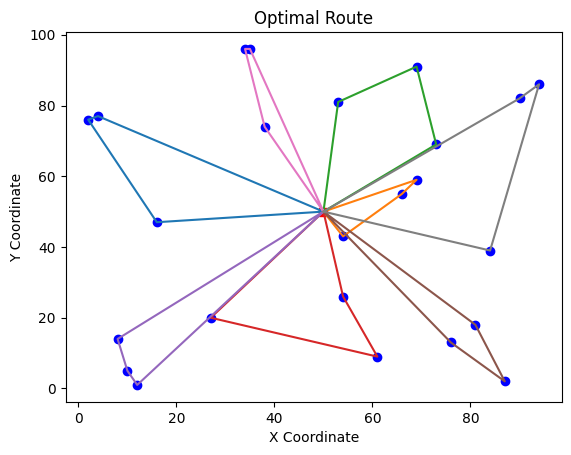

In [17]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
        total_distance += vehicle_distance
        distances.append(vehicle_distance)
    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty

toolbox.register("evaluate", evalVRP)  # Register the evaluation function
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection

# Plotting Function
def plot_routes(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

# Running the Genetic Algorithm
def main():
    random.seed(42)  # Seed for reproducibility
    pop = toolbox.population(n=300)  # Generate initial population
    hof = tools.HallOfFame(1)  # Hall of Fame to store the best individual

    # Setup statistics to track
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Run the genetic algorithm
    algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats=stats, halloffame=hof)

    # Plot the best route found
    plot_routes(hof[0], "Optimal Route")
    return pop, stats, hof

if __name__ == "__main__":
    main()